      CASE#      DATE OF OCCURRENCE                                BLOCK  \
0  JG406115  08/31/2023 07:00:00 PM                 042XX W MARQUETTE RD   
1  JG425966  09/15/2023 11:20:00 PM                      010XX W 84TH ST   
2  JG412467  08/31/2023 09:13:00 PM                   093XX S WABASH AVE   
3  JG426285  09/15/2023 06:00:00 PM  057XX S DR MARTIN LUTHER KING JR DR   
4  JH178504  03/07/2024 01:50:00 AM                    059XX W FULTON ST   

   IUCR  PRIMARY DESCRIPTION  \
0  0498              BATTERY   
1  0486              BATTERY   
2  0910  MOTOR VEHICLE THEFT   
3  1320      CRIMINAL DAMAGE   
4  0486              BATTERY   

                               SECONDARY DESCRIPTION  \
0  AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...   
1                            DOMESTIC BATTERY SIMPLE   
2                                         AUTOMOBILE   
3                                         TO VEHICLE   
4                            DOMESTIC BATTERY SIMPLE   

             

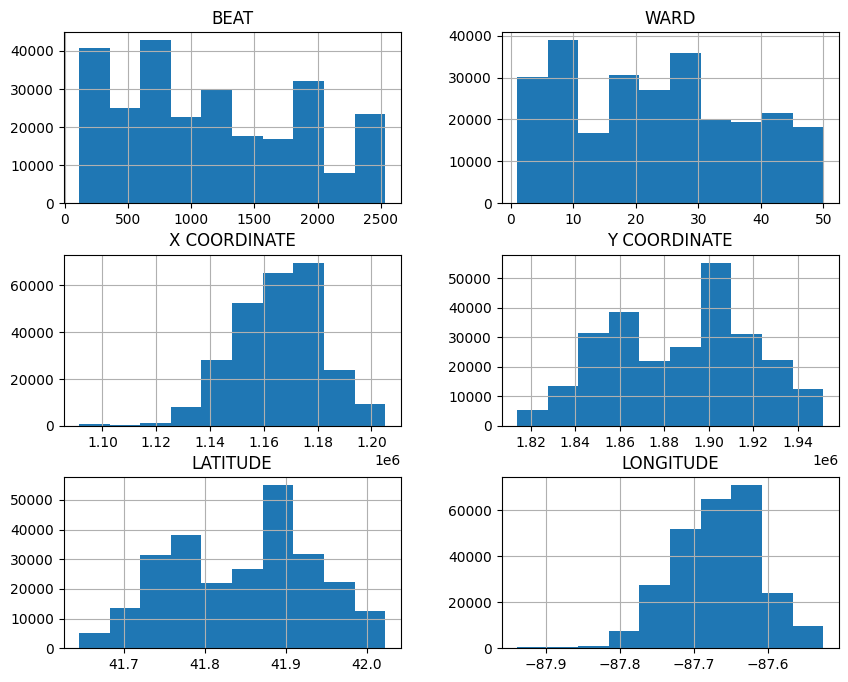

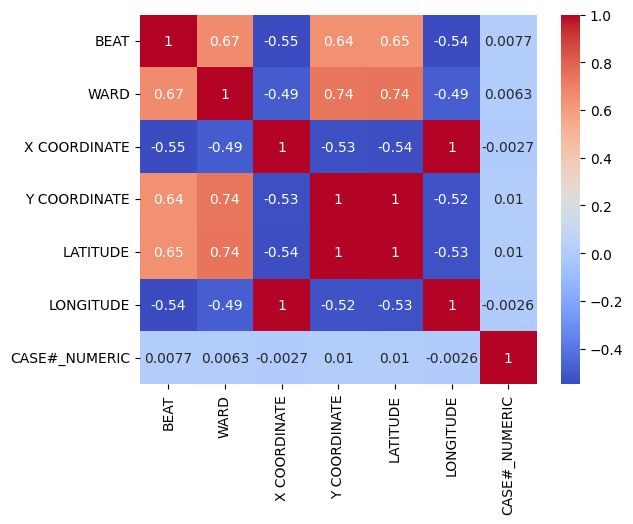

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import numpy as np

# Cargar los datos
data = pd.read_csv('data.csv')

# Mostrar las primeras filas de los datosclear

print(data.head())

# Descripción estadística de los datos numéricos
print(data.describe())

# Distribución de características categóricas
categorical_columns = ['PRIMARY DESCRIPTION', 'SECONDARY DESCRIPTION', 'LOCATION DESCRIPTION']
for col in categorical_columns:
    print(f"Distribución de {col}:")
    print(data[col].value_counts())

# Histograma de las características numéricas
data.hist(figsize=(10, 8))
plt.show()
# extraer solo numeros de la columna case
data_cleaned_case_numeric =data.copy()
data_cleaned_case_numeric.loc[:, 'CASE#_NUMERIC']= data['CASE#'].apply(lambda x: int(re.findall(r'\d+',x)[0]))

data_numeric=data_cleaned_case_numeric.select_dtypes(include=[np.number])


# Mapa de calor de la correlación
corr_matrix = data_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()